In [62]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt 
from sklearn import tree, metrics, model_selection, preprocessing
from IPython.display import Image, display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [63]:
df = pd.read_csv('Automobile_data.csv')
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [65]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [66]:
df = df.replace( '?' , np.nan )

In [67]:
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [68]:
#normalized-losses
df['normalized-losses'] = pd.to_numeric(df['normalized-losses'], errors='coerce')
median_value = df['normalized-losses'].median()
df['normalized-losses'].fillna(median_value, inplace=True)

# bore
df['bore'] = pd.to_numeric(df['bore'], errors='coerce')
median_value = df['bore'].median()
df['bore'].fillna(median_value, inplace=True)

# stroke
df['stroke'] = pd.to_numeric(df['stroke'], errors='coerce')
median_value = df['stroke'].median()
df['stroke'].fillna(median_value, inplace=True)

# horsepower
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
median_value = df['horsepower'].median()
df['horsepower'].fillna(median_value, inplace=True)

#peak-rpm
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'], errors='coerce')
median_value = df['peak-rpm'].median()
df['peak-rpm'].fillna(median_value, inplace=True)

# price
df['price'] = pd.to_numeric(df['price'], errors='coerce')
median_value = df['price'].median()
df['price'].fillna(median_value, inplace=True)

C:\Users\CHAUDCH\AppData\Local\Temp\ipykernel_30532\3091463926.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['normalized-losses'].fillna(median_value, inplace=True)
C:\Users\CHAUDCH\AppData\Local\Temp\ipykernel_30532\3091463926.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [69]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [70]:
df = df.dropna()

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          203 non-null    int64  
 1   normalized-losses  203 non-null    float64
 2   make               203 non-null    object 
 3   fuel-type          203 non-null    object 
 4   aspiration         203 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         203 non-null    object 
 7   drive-wheels       203 non-null    object 
 8   engine-location    203 non-null    object 
 9   wheel-base         203 non-null    float64
 10  length             203 non-null    float64
 11  width              203 non-null    float64
 12  height             203 non-null    float64
 13  curb-weight        203 non-null    int64  
 14  engine-type        203 non-null    object 
 15  num-of-cylinders   203 non-null    object 
 16  engine-size        203 non-null

In [72]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          203 non-null    int64  
 1   normalized-losses  203 non-null    float64
 2   make               203 non-null    object 
 3   fuel-type          203 non-null    object 
 4   aspiration         203 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         203 non-null    object 
 7   drive-wheels       203 non-null    object 
 8   engine-location    203 non-null    object 
 9   wheel-base         203 non-null    float64
 10  length             203 non-null    float64
 11  width              203 non-null    float64
 12  height             203 non-null    float64
 13  curb-weight        203 non-null    int64  
 14  engine-type        203 non-null    object 
 15  num-of-cylinders   203 non-null    object 
 16  engine-size        203 non-null

In [74]:
df.make.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [75]:
# Import label encoder
from sklearn import preprocessing

# Create a label encoder object
label_encoder = preprocessing.LabelEncoder()

# Encode labels in the 'Country' column
df['make'] = label_encoder.fit_transform(df['make'])

In [76]:
df.make.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

In [77]:
df['fuel-type'] = label_encoder.fit_transform(df['fuel-type'])
df['aspiration'] = label_encoder.fit_transform(df['aspiration'])
df['num-of-doors'] = label_encoder.fit_transform(df['num-of-doors'])
df['body-style'] = label_encoder.fit_transform(df['body-style'])
df['drive-wheels'] = label_encoder.fit_transform(df['drive-wheels'])
df['engine-location'] = label_encoder.fit_transform(df['engine-location'])
df['engine-type'] = label_encoder.fit_transform(df['engine-type'])
df['num-of-cylinders'] = label_encoder.fit_transform(df['num-of-cylinders'])
df['fuel-system'] = label_encoder.fit_transform(df['fuel-system'])

In [78]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,0,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,1,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,1,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


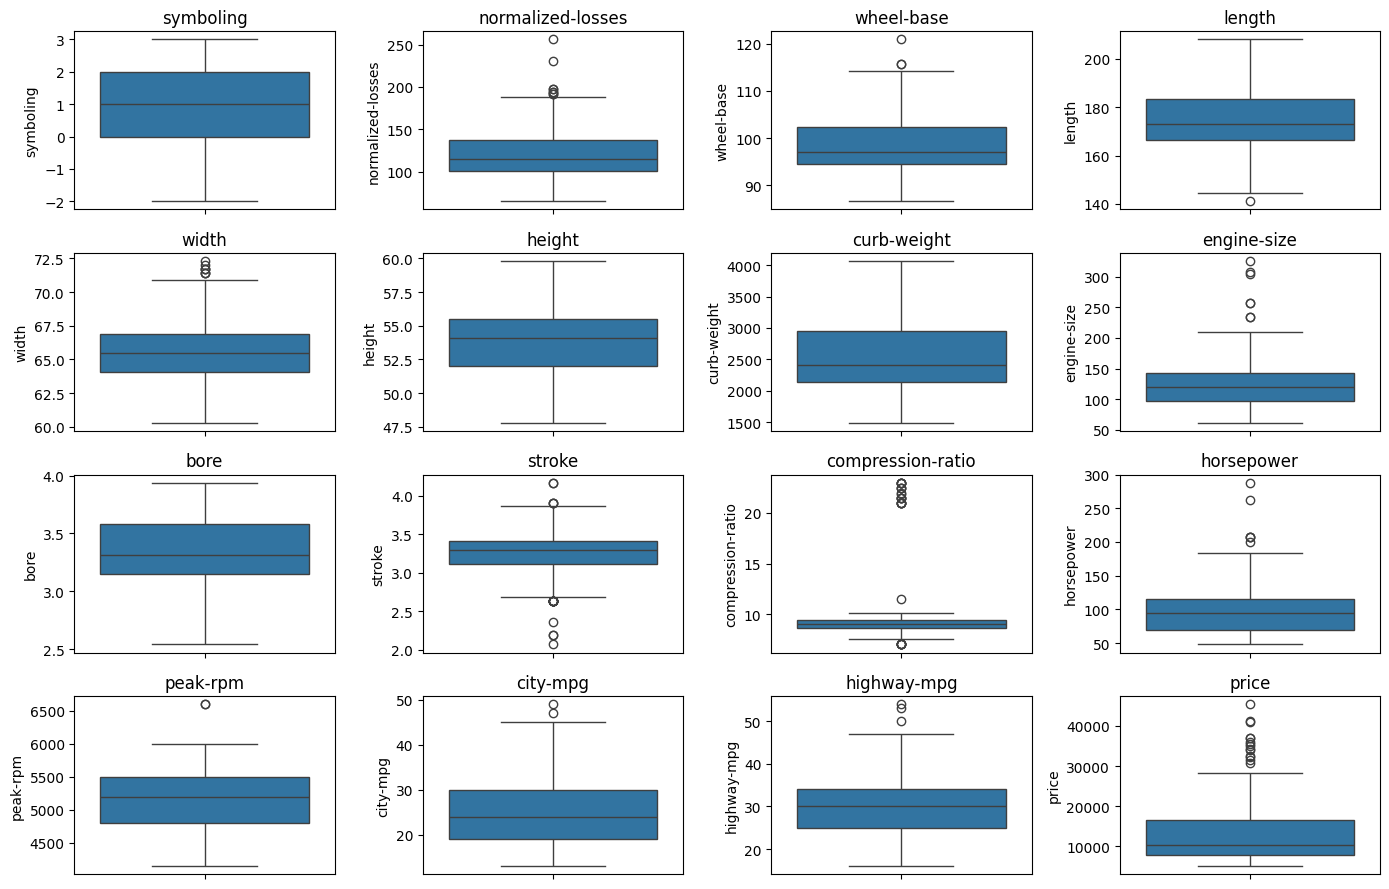

In [79]:
plt.figure(figsize=(14,9))

plt.subplot(4,4,1)
sns.boxplot(df['symboling'])
plt.title('symboling')

plt.subplot(4,4,2)
sns.boxplot(df['normalized-losses'])
plt.title('normalized-losses')

plt.subplot(4,4,3)
sns.boxplot(df['wheel-base'])
plt.title('wheel-base')

plt.subplot(4,4,4)
sns.boxplot(df['length'])
plt.title('length')

plt.subplot(4,4,5)
sns.boxplot(df['width'])
plt.title('width')

plt.subplot(4,4,6)
sns.boxplot(df['height'])
plt.title('height')

plt.subplot(4,4,7)
sns.boxplot(df['curb-weight'])
plt.title('curb-weight')

plt.subplot(4,4,8)
sns.boxplot(df['engine-size'])
plt.title('engine-size')

plt.subplot(4,4,9)
sns.boxplot(df['bore'])
plt.title('bore')

plt.subplot(4,4,10)
sns.boxplot(df['stroke'])
plt.title('stroke')

plt.subplot(4,4,11)
sns.boxplot(df['compression-ratio'])
plt.title('compression-ratio')

plt.subplot(4,4,12)
sns.boxplot(df['horsepower'])
plt.title('horsepower')

plt.subplot(4,4,13)
sns.boxplot(df['peak-rpm'])
plt.title('peak-rpm')

plt.subplot(4,4,14)
sns.boxplot(df['city-mpg'])
plt.title('city-mpg')

plt.subplot(4,4,15)
sns.boxplot(df['highway-mpg'])
plt.title('highway-mpg')

plt.subplot(4,4,16)
sns.boxplot(df['price'])
plt.title('price')

plt.tight_layout()
plt.show()


In [80]:
df['normalized-losses'] = df['normalized-losses'].clip( lower = df['normalized-losses'].quantile(0.05) , upper = df['normalized-losses'].quantile(0.95))

df['wheel-base'] = df['wheel-base'].clip( lower = df['wheel-base'].quantile(0.05) , upper = df['wheel-base'].quantile(0.95))

df['length'] = df['length'].clip( lower = df['length'].quantile(0.05) , upper = df['length'].quantile(0.95))

df['width'] = df['width'].clip( lower = df['width'].quantile(0.05) , upper = df['width'].quantile(0.95))

df['engine-size'] = df['engine-size'].clip( lower = df['engine-size'].quantile(0.05) , upper = df['engine-size'].quantile(0.95))

df['stroke'] = df['stroke'].clip( lower = df['stroke'].quantile(0.15) , upper = df['stroke'].quantile(0.85))

df['compression-ratio'] = df['compression-ratio'].clip( lower = df['compression-ratio'].quantile(0.05) , upper = df['compression-ratio'].quantile(0.95))

df['horsepower'] = df['horsepower'].clip( lower = df['horsepower'].quantile(0.05) , upper = df['horsepower'].quantile(0.95))

df['peak-rpm'] = df['peak-rpm'].clip( lower = df['peak-rpm'].quantile(0.05) , upper = df['peak-rpm'].quantile(0.95))

df['city-mpg'] = df['city-mpg'].clip( lower = df['city-mpg'].quantile(0.05) , upper = df['city-mpg'].quantile(0.95))

df['highway-mpg'] = df['highway-mpg'].clip( lower = df['highway-mpg'].quantile(0.05) , upper = df['highway-mpg'].quantile(0.95))

df['price'] = df['price'].clip( lower = df['price'].quantile(0.05) , upper = df['price'].quantile(0.95))

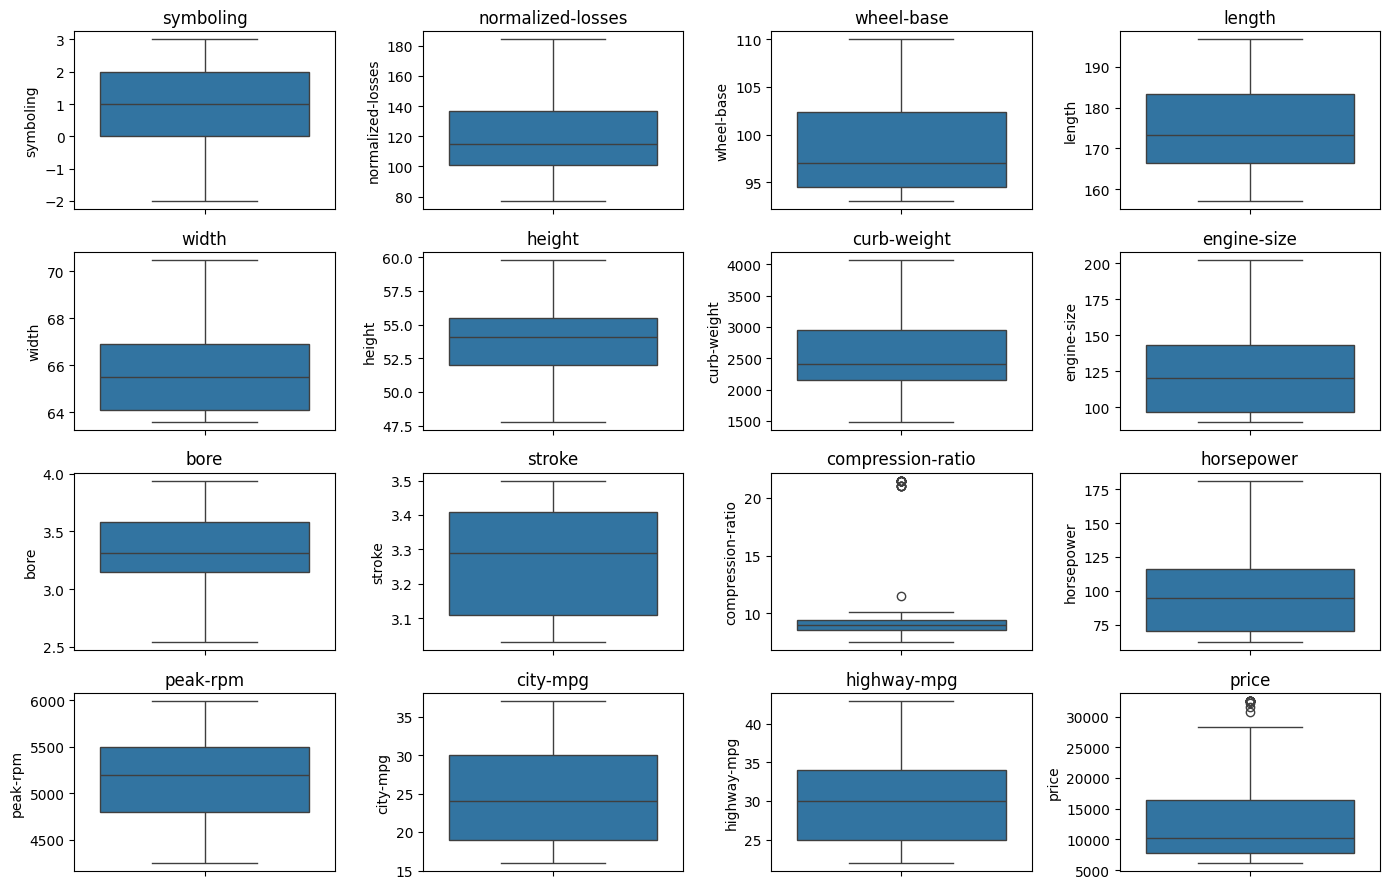

In [81]:
plt.figure(figsize=(14,9))

plt.subplot(4,4,1)
sns.boxplot(df['symboling'])
plt.title('symboling')

plt.subplot(4,4,2)
sns.boxplot(df['normalized-losses'])
plt.title('normalized-losses')

plt.subplot(4,4,3)
sns.boxplot(df['wheel-base'])
plt.title('wheel-base')

plt.subplot(4,4,4)
sns.boxplot(df['length'])
plt.title('length')

plt.subplot(4,4,5)
sns.boxplot(df['width'])
plt.title('width')

plt.subplot(4,4,6)
sns.boxplot(df['height'])
plt.title('height')

plt.subplot(4,4,7)
sns.boxplot(df['curb-weight'])
plt.title('curb-weight')

plt.subplot(4,4,8)
sns.boxplot(df['engine-size'])
plt.title('engine-size')

plt.subplot(4,4,9)
sns.boxplot(df['bore'])
plt.title('bore')

plt.subplot(4,4,10)
sns.boxplot(df['stroke'])
plt.title('stroke')

plt.subplot(4,4,11)
sns.boxplot(df['compression-ratio'])
plt.title('compression-ratio')

plt.subplot(4,4,12)
sns.boxplot(df['horsepower'])
plt.title('horsepower')

plt.subplot(4,4,13)
sns.boxplot(df['peak-rpm'])
plt.title('peak-rpm')

plt.subplot(4,4,14)
sns.boxplot(df['city-mpg'])
plt.title('city-mpg')

plt.subplot(4,4,15)
sns.boxplot(df['highway-mpg'])
plt.title('highway-mpg')

plt.subplot(4,4,16)
sns.boxplot(df['price'])
plt.title('price')

plt.tight_layout()
plt.show()

In [82]:
df['compression-ratio'] = df['compression-ratio'].clip( lower = df['compression-ratio'].quantile(0.15) , upper = df['compression-ratio'].quantile(0.85))

df['price'] = df['price'].clip( lower = df['price'].quantile(0.15) , upper = df['price'].quantile(0.85))

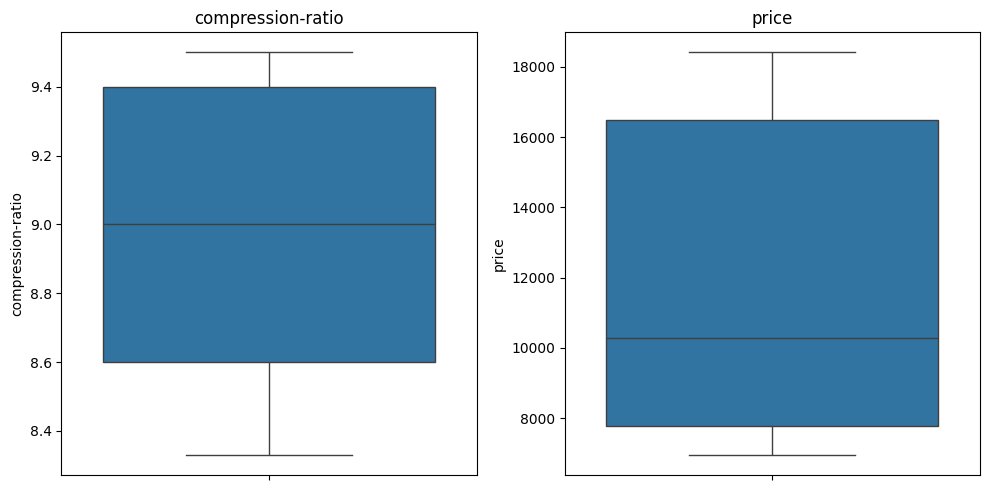

In [83]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.boxplot(df['compression-ratio'])
plt.title('compression-ratio')

plt.subplot(1,2,2)
sns.boxplot(df['price'])
plt.title('price')

plt.tight_layout()
plt.show()

In [84]:
X = df.drop(['price'], axis=1)
y = df['price']

In [85]:
print(X.shape, y.shape)

(203, 25) (203,)


In [87]:
X.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,115.0,0,1,0,1,0,2,0,93.01,...,2,130.0,5,3.47,3.03,9.00,111.0,5000.0,21,27.0
1,3,115.0,0,1,0,1,0,2,0,93.01,...,2,130.0,5,3.47,3.03,9.00,111.0,5000.0,21,27.0
2,1,115.0,0,1,0,1,2,2,0,94.50,...,3,152.0,5,2.68,3.47,9.00,154.0,5000.0,19,26.0
3,2,164.0,1,1,0,0,3,1,0,99.80,...,2,109.0,5,3.19,3.40,9.50,102.0,5500.0,24,30.0
4,2,164.0,1,1,0,0,3,0,0,99.40,...,1,136.0,5,3.19,3.40,8.33,115.0,5500.0,18,22.0


In [88]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [90]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [91]:
from sklearn.linear_model import LinearRegression
model_1 = LinearRegression()

In [92]:
model_1.fit(X_train,y_train)

LinearRegression()

In [93]:
y_pred = model_1.predict(X_test)

In [94]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

1519.573707816941

In [95]:
metrics.mean_squared_error(y_test,y_pred)

3671089.995614006

In [96]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

R² Score: 0.799778491817283


In [97]:
df.corr()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.454863,-0.120945,0.188685,-0.063586,0.664550,-0.596221,-0.043356,0.212407,-0.532504,...,-0.079211,0.090467,-0.131681,-0.005892,0.060005,0.063829,0.275684,-0.053474,0.020129,-0.077659
normalized-losses,0.454863,1.000000,-0.252766,0.101540,-0.011881,0.349329,-0.253280,0.301252,-0.021143,-0.052533,...,0.097215,0.195067,-0.049304,0.057922,-0.024458,0.181615,0.222968,-0.208524,-0.159191,0.209833
make,-0.120945,-0.252766,1.000000,-0.124704,0.067567,-0.161528,0.094477,-0.010132,0.053711,0.068003,...,-0.056678,0.152903,0.247806,-0.205132,0.169485,-0.066692,-0.239587,0.084775,0.051150,-0.097167
fuel-type,0.188685,0.101540,-0.124704,1.000000,-0.426434,0.181675,-0.145355,-0.143700,0.039356,-0.324049,...,-0.112183,0.039292,-0.051218,-0.324061,-0.371525,0.144393,0.476060,-0.241838,-0.148631,-0.149224
aspiration,-0.063586,-0.011881,0.067567,-0.426434,1.000000,-0.046350,0.060111,0.072255,-0.056864,0.287879,...,0.178205,0.282567,0.228734,0.220105,-0.187319,0.283780,-0.190959,-0.208574,-0.281381,0.317690
num-of-doors,0.664550,0.349329,-0.161528,0.181675,-0.046350,1.000000,-0.685033,0.100344,0.138613,-0.441721,...,-0.013796,0.010246,-0.114737,-0.001683,0.076772,0.098561,0.230912,-0.004175,0.029092,-0.104706
body-style,-0.596221,-0.253280,0.094477,-0.145355,0.060111,-0.685033,1.000000,-0.153550,-0.276765,0.375633,...,-0.086676,-0.066918,0.013598,-0.008457,-0.038280,-0.140076,-0.107376,0.041405,-0.013741,0.008165
drive-wheels,-0.043356,0.301252,-0.010132,-0.143700,0.072255,0.100344,-0.153550,1.000000,0.147420,0.498754,...,0.580938,0.428384,0.479806,0.029220,0.091268,0.532417,-0.053866,-0.462632,-0.460509,0.633757
engine-location,0.212407,-0.021143,0.053711,0.039356,-0.056864,0.138613,-0.276765,0.147420,1.000000,-0.136317,...,0.258510,0.106627,0.185272,-0.174955,0.141601,0.274688,0.209812,-0.165150,-0.114789,0.187998
wheel-base,-0.532504,-0.052533,0.068003,-0.324049,0.287879,-0.441721,0.375633,0.498754,-0.136317,1.000000,...,0.586675,0.423954,0.514508,0.197075,-0.195316,0.442276,-0.340693,-0.487063,-0.550175,0.688608


<Axes: >

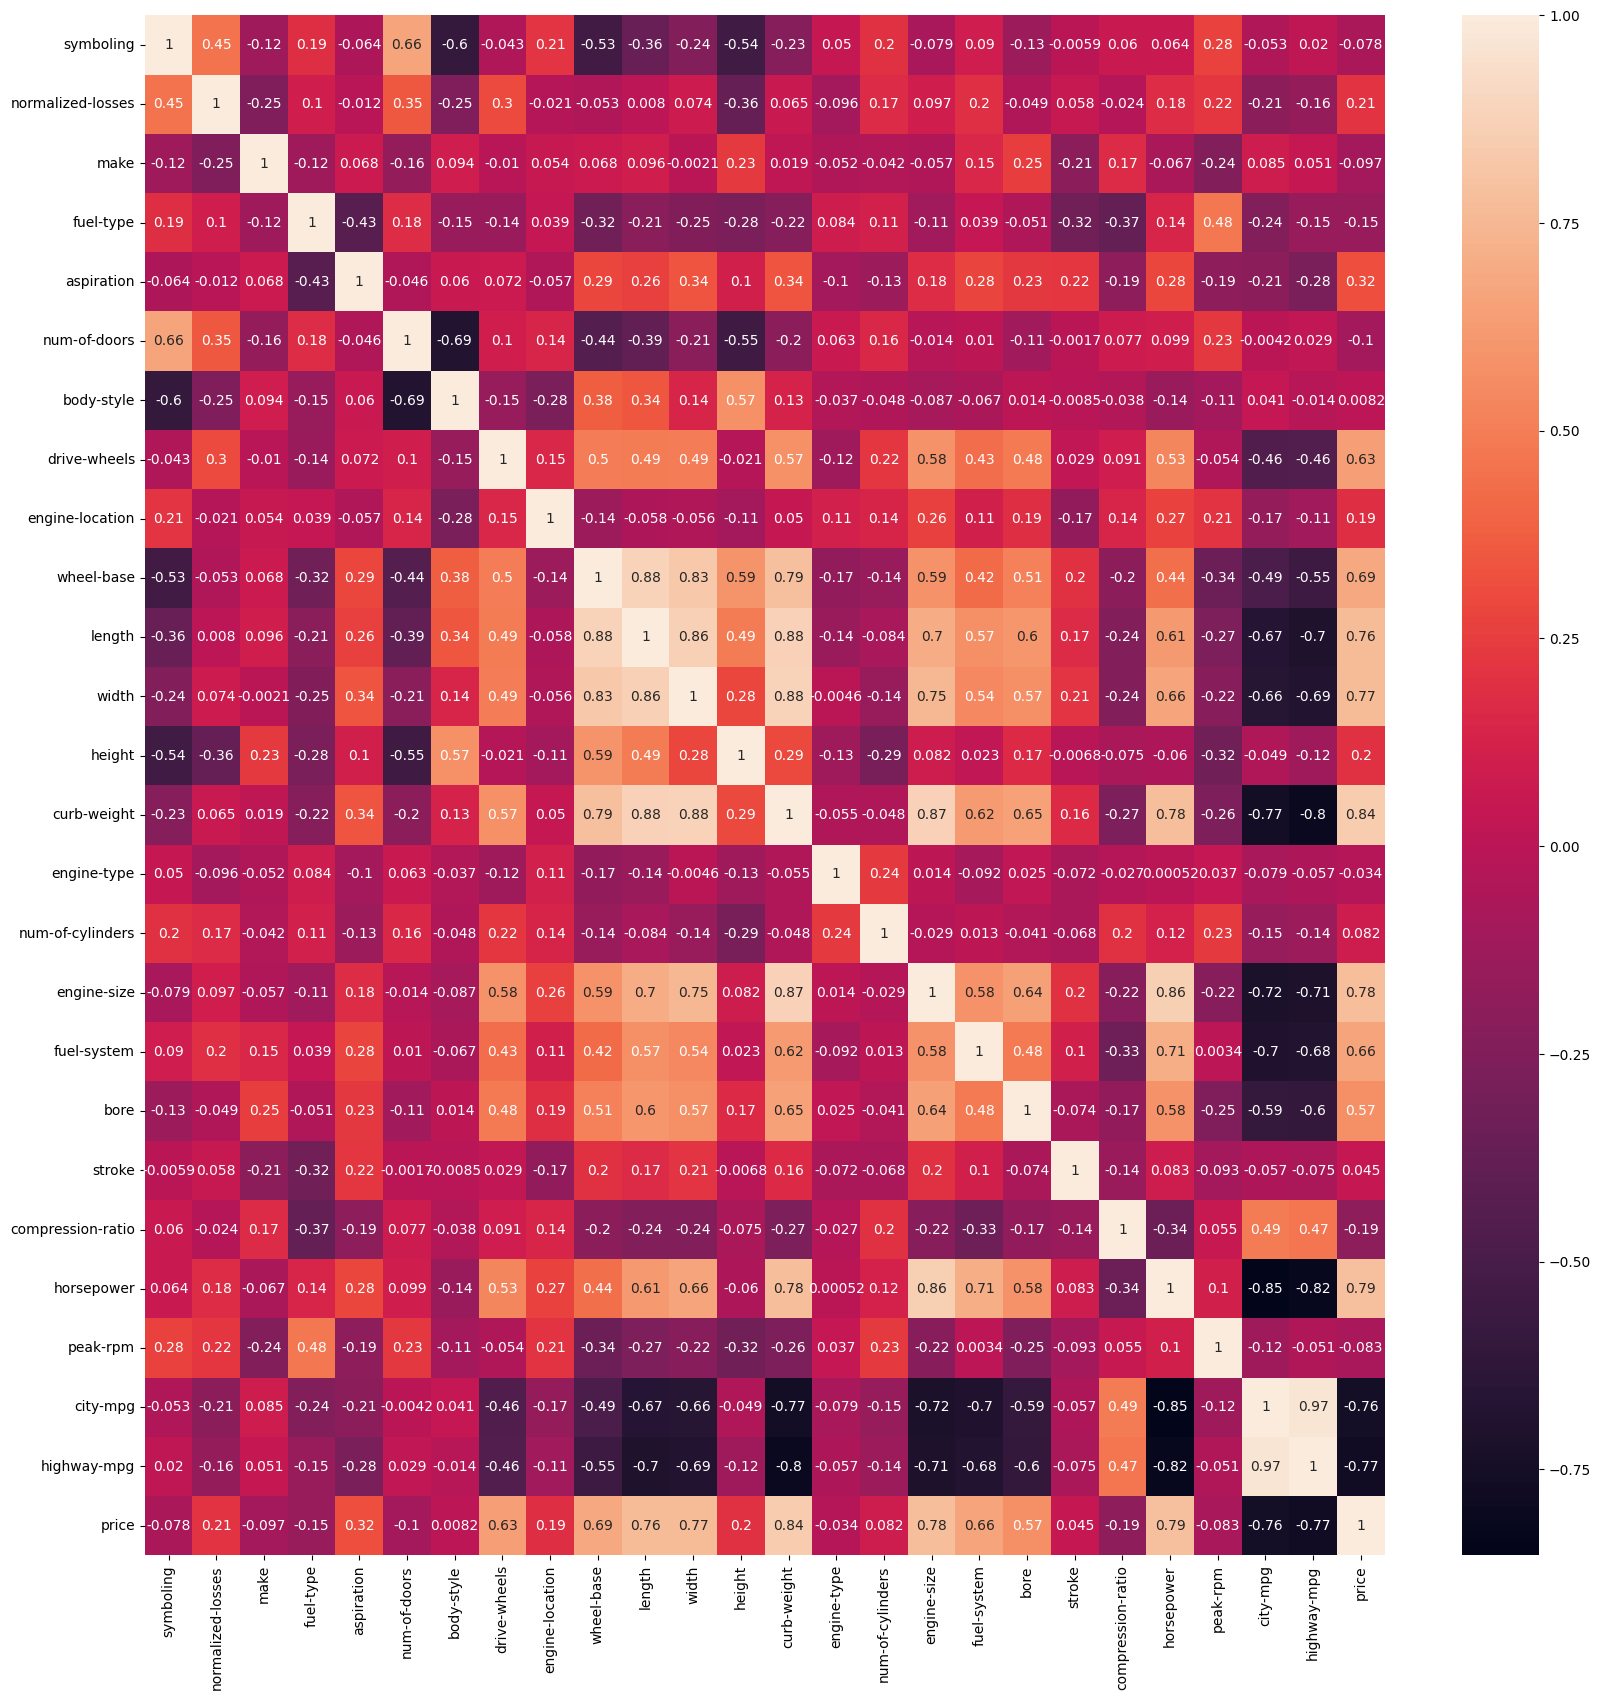

In [98]:
plt.figure(figsize=(20,20))

sns.heatmap(df.corr(), annot=True)

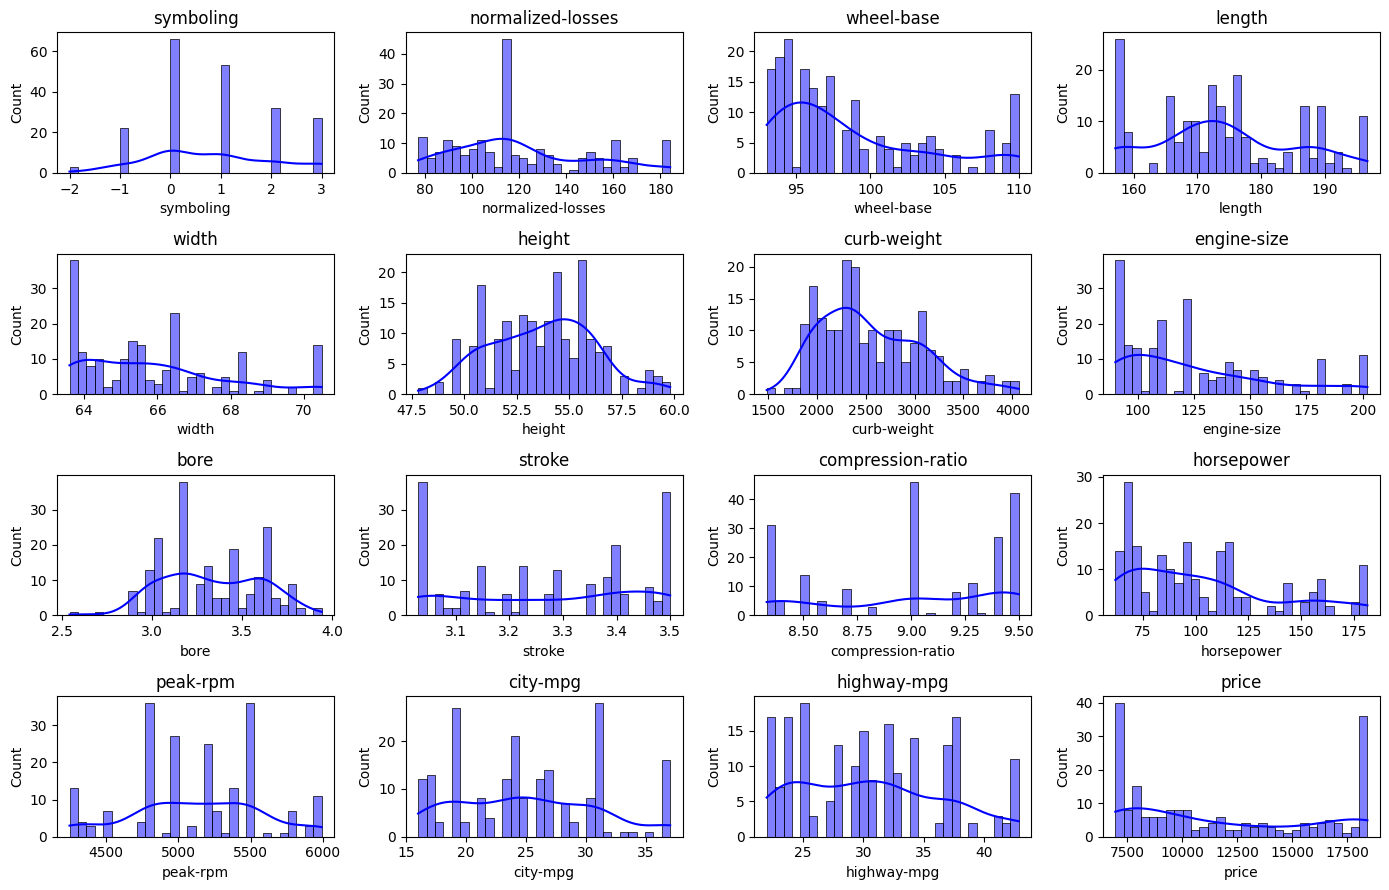

In [99]:
plt.figure(figsize=(14,9))

plt.subplot(4,4,1)
sns.histplot(df['symboling'], kde=True, color='blue', bins=30, edgecolor='black')
plt.title('symboling')

plt.subplot(4,4,2)
sns.histplot(df['normalized-losses'], kde=True, color='blue', bins=30, edgecolor='black')
plt.title('normalized-losses')

plt.subplot(4,4,3)
sns.histplot(df['wheel-base'], kde=True, color='blue', bins=30, edgecolor='black')
plt.title('wheel-base')

plt.subplot(4,4,4)
sns.histplot(df['length'], kde=True, color='blue', bins=30, edgecolor='black')
plt.title('length')

plt.subplot(4,4,5)
sns.histplot(df['width'], kde=True, color='blue', bins=30, edgecolor='black')
plt.title('width')

plt.subplot(4,4,6)
sns.histplot(df['height'], kde=True, color='blue', bins=30, edgecolor='black')
plt.title('height')

plt.subplot(4,4,7)
sns.histplot(df['curb-weight'], kde=True, color='blue', bins=30, edgecolor='black')
plt.title('curb-weight')

plt.subplot(4,4,8)
sns.histplot(df['engine-size'], kde=True, color='blue', bins=30, edgecolor='black')
plt.title('engine-size')

plt.subplot(4,4,9)
sns.histplot(df['bore'], kde=True, color='blue', bins=30, edgecolor='black')
plt.title('bore')

plt.subplot(4,4,10)
sns.histplot(df['stroke'], kde=True, color='blue', bins=30, edgecolor='black')
plt.title('stroke')

plt.subplot(4,4,11)
sns.histplot(df['compression-ratio'], kde=True, color='blue', bins=30, edgecolor='black')
plt.title('compression-ratio')

plt.subplot(4,4,12)
sns.histplot(df['horsepower'], kde=True, color='blue', bins=30, edgecolor='black')
plt.title('horsepower')

plt.subplot(4,4,13)
sns.histplot(df['peak-rpm'], kde=True, color='blue', bins=30, edgecolor='black')
plt.title('peak-rpm')

plt.subplot(4,4,14)
sns.histplot(df['city-mpg'], kde=True, color='blue', bins=30, edgecolor='black')
plt.title('city-mpg')

plt.subplot(4,4,15)
sns.histplot(df['highway-mpg'], kde=True, color='blue', bins=30, edgecolor='black')
plt.title('highway-mpg')

plt.subplot(4,4,16)
sns.histplot(df['price'], kde=True, color='blue', bins=30, edgecolor='black')
plt.title('price')

plt.tight_layout()
plt.show()

In [100]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca.shape

(203, 2)

In [101]:
X.shape

(203, 25)

In [102]:
pca.explained_variance_ratio_

array([0.6463252 , 0.35060124])

In [103]:
pca.n_components_

2

In [104]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [60]:
y.shape

(203,)

In [106]:
model_2 = LinearRegression()
model_2.fit(X_train_pca,y_train)

LinearRegression()

In [109]:
y_pred_pca = model_2.predict(X_test_pca)
y_pred_pca

array([14806.62364879, 17392.80221986,  8223.57425508, 12994.58298762,
       14562.23378692,  8068.4133758 ,  8148.78281467,  9219.00769155,
       14644.48622586,  9905.93560637, 15457.41733332, 15705.73610817,
        7423.72699672, 19179.13094407, 11435.57561309, 10353.14718612,
       16002.56625667, 12412.80295239,  8367.79730006, 14870.66287091,
       12019.79118759, 10215.31242188, 14330.51395032,  6934.48640047,
       12213.60223923, 15702.61115853,  9344.1314673 , 16031.39992048,
       17122.24479083,  9419.76501547, 10321.934706  , 12507.01115502,
       10375.69055339,  9238.10407086, 11645.4183795 ,  8223.57425508,
       11542.69021839,  8106.2169492 , 11175.10920974, 14199.65143503,
        8825.0115202 ])

In [110]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred_pca)

1807.108132753403

In [111]:
metrics.mean_squared_error(y_test,y_pred_pca)

4805344.761354348

In [112]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred_pca)
print(f"R² Score: {r2}")

R² Score: 0.7379161566167585


In [122]:
from sklearn.model_selection import train_test_split
X_train_svc, X_test_svc, y_train_svc, y_test_svc = train_test_split(X, y, test_size=0.2, random_state=30)

In [123]:
from sklearn.svm import SVC
model = SVC()